In [5]:
!pip install quantstats yfinance python-binance
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import quantstats as qs
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

api_key = ""
api_secret = ""
client = Client(api_key, api_secret)

In [6]:
# extend pandas functionality with metrics, etc.
qs.extend_pandas()

# fetch the daily returns for a stock
stock = qs.utils.download_returns('FB')

# show sharpe ratio
qs.stats.sharpe(stock)

# or using extend_pandas() :)
stock.sharpe()

0.6725516241237434

In [15]:
stock

Date
2012-05-18         NaN
2012-05-21   -0.109861
2012-05-22   -0.089039
2012-05-23    0.032258
2012-05-24    0.032187
                ...   
2022-03-30   -0.008744
2022-03-31   -0.024095
2022-04-01    0.011198
2022-04-04    0.040205
2022-04-05   -0.008765
Name: Close, Length: 2487, dtype: float64

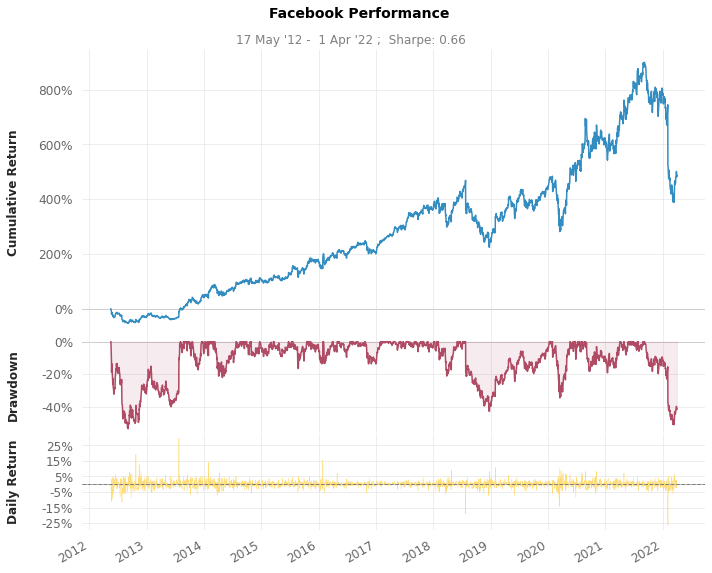

In [ ]:
qs.plots.snapshot(stock, title='Facebook Performance')

# can also be called via:
# stock.plot_snapshot(title='Facebook Performance')

In [ ]:
# manual Calculation

[*********************100%***********************]  1 of 1 completed


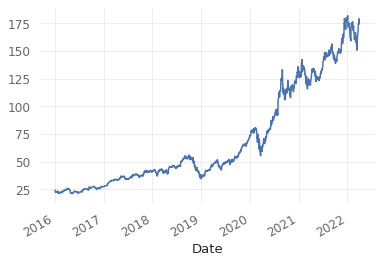

In [ ]:
# Import the yfinance. If you get module not found error the run !pip install yfinance from your Jupyter notebook

# Get the data for the stock AAPL
data = yf.download('AAPL','2016-01-01','2022-08-01')

# Import the plotting library


# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

In [ ]:
data['dailyReturn'] = data['Close'].pct_change(1)
sharpeRatio = data['dailyReturn'].mean() / data['dailyReturn'].std()
A_sharpeRatio = sharpeRatio * (252**0.5)
A_sharpeRatio

1.1765421771207532

In [6]:

klinesH = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_1HOUR, "5 year ago UTC")

In [44]:
klinesD = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_1DAY, "5 year ago UTC")

In [43]:
klinesW = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_1WEEK, "5 year ago UTC")

In [46]:
klinesM = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_1MONTH, "5 year ago UTC")

In [47]:
from datetime import datetime
klines = klinesW
df = pd.DataFrame(klines)
lst = []
for i in klines:
    datee = datetime.fromtimestamp(i[0] / 1000)
    lst.append(str(datee))

df['Date1'] = lst
df['Date'] = pd.to_datetime(df['Date1'], format='%Y-%m-%d %H')

df = df.drop(columns=[0, 5, 6, 7, 8, 9, 10, 11, 2, 3, 4, 'Date1'])

In [10]:
df.head()

,1,Date
0,301.13000000,2017-08-17 04:00:00
1,301.61000000,2017-08-17 05:00:00
2,302.40000000,2017-08-17 06:00:00
3,302.68000000,2017-08-17 07:00:00
4,307.95000000,2017-08-17 08:00:00


In [29]:
df = df.set_index("Date")
df['returns'] = df[1].astype(float).pct_change(1)

In [104]:
eth = df['returns']

In [181]:
# show sharpe ratio
qs.stats.sharpe(eth)

# or using extend_pandas() :)
eth.sharpe()

2.2343103064278362

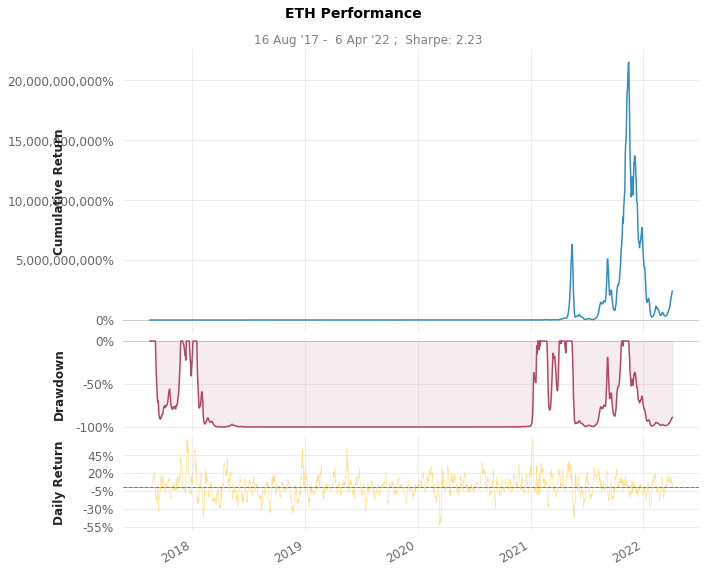

In [182]:
qs.plots.snapshot(eth, title='ETH Performance')
 

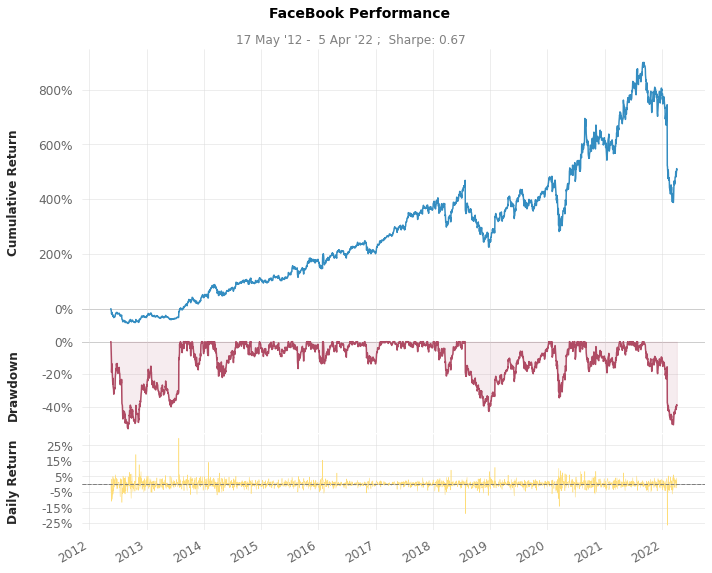

In [59]:
qs.plots.snapshot(stock, title='FaceBook Performance')


In [57]:
eth

Date
2021-04-07         NaN
2021-04-08   -0.070428
2021-04-09    0.059553
2021-04-10   -0.006345
2021-04-11    0.032073
                ...   
2022-04-02    0.052930
2022-04-03   -0.003308
2022-04-04    0.022687
2022-04-05   -0.000681
2022-04-06   -0.031965
Name: returns, Length: 365, dtype: float64

In [96]:
eth

Date
2017-08-17         NaN
2017-08-18    0.002889
2017-08-19   -0.028775
2017-08-20   -0.013297
2017-08-21    0.033482
                ...   
2022-04-02    0.052930
2022-04-03   -0.003308
2022-04-04    0.022687
2022-04-05   -0.000681
2022-04-06   -0.031965
Name: returns, Length: 1694, dtype: float64

In [116]:
returns = eth.pct_change(1).fillna(0).to_numpy()
# df['returns'] = eth.pct_change(1)

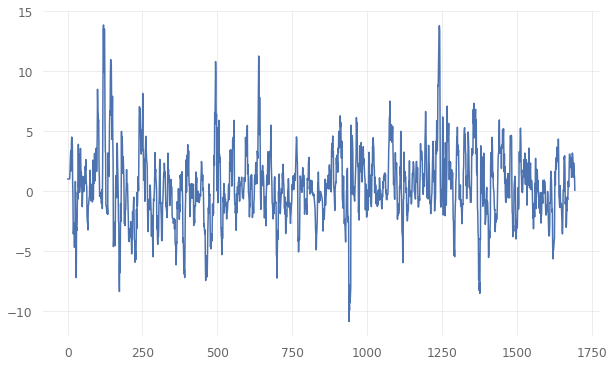

In [111]:
simulated_equity = (1+returns).cumprod()
plt.plot(simulated_equity)

In [117]:
df['returns'] = returns

In [108]:
simulated_equity[simulated_equity == 0]

Date
2018-06-26   -0.0
2018-06-27    0.0
2018-06-28   -0.0
2018-06-29    0.0
2018-06-30   -0.0
             ... 
2022-04-02   -0.0
2022-04-03   -0.0
2022-04-04   -0.0
2022-04-05   -0.0
2022-04-06   -0.0
Name: returns, Length: 1381, dtype: float64

In [114]:
def Drawdown(return_series: pd.Series):
    """
    Documentation String:
    Takes a Timeseries of Equity return.
    Computes and returns a Data frame with:
    1. Wealth index
    2. Previous peaks
    3. Percentage Drawdown
    """
    wealth_index= 1*(1+return_series).cumprod()
    previous_peaks=wealth_index.cummax()
    drawdown=(wealth_index-previous_peaks)/previous_peaks
    
    return pd.DataFrame({
        "Wealth": wealth_index,
        "peaks": previous_peaks,
        "Drawdown": drawdown
    })

Text(0, 0.5, 'Wealth Vs Peaks')

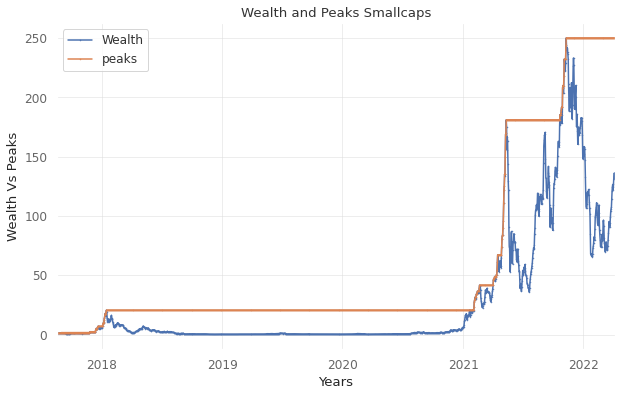

In [124]:
"""Lets plot the Data by calling plot instead of head function"""

ax=Drawdown(df['returns'])[["Wealth","peaks"]].plot(marker='.', markersize=1,title="Wealth and Peaks Smallcaps")
ax.set_xlabel("Years")
ax.set_ylabel("Wealth Vs Peaks")

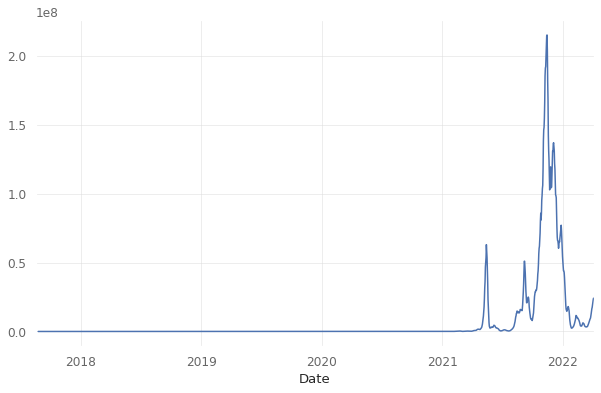

In [138]:
df['returns'] = df[1].astype(float).pct_change(periods=7)
(df.returns + 1).cumprod()[:].plot()

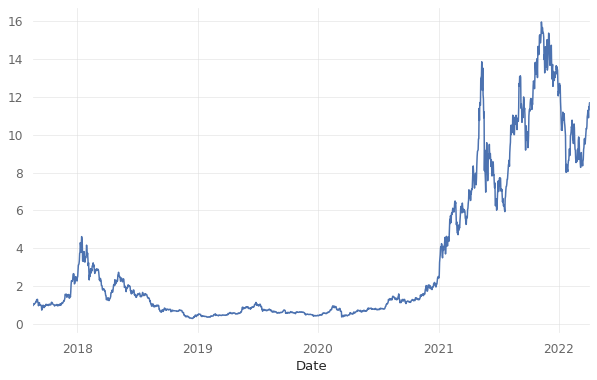

In [177]:
monthly_returns = df[1].resample('1d').ffill().astype(float).pct_change()
(monthly_returns + 1).cumprod()[:].plot()

In [169]:
df

,1,returns
Date,,
2017-08-17,301.13000000,NaN
2017-08-18,302.00000000,0.002889
2017-08-19,293.31000000,-0.028775
2017-08-20,289.41000000,-0.013297
2017-08-21,299.10000000,0.033482
...,...,...
2022-04-02,3455.20000000,0.052930
2022-04-03,3443.77000000,-0.003308
2022-04-04,3521.90000000,0.022687


In [172]:
3407/301.12 - 1

10.3144261424017

In [60]:
from datetime import datetime
klines = klinesD
df = pd.DataFrame(klines)
lst = []
for i in klines:
    datee = datetime.fromtimestamp(i[0] / 1000)
    lst.append(str(datee))

df['Date1'] = lst
df['Date'] = pd.to_datetime(df['Date1'], format='%Y-%m-%d %H')

df = df.drop(columns=[0, 5, 6, 7, 8, 9, 10, 11, 2, 3, 4, 'Date1'])

**Here I'm starting My strategy** Selling only when not in dawndraw


In [61]:
df['returns'] = df[1].astype(float).pct_change(1)
df.head()

,1,Date,returns
0,301.13000000,2017-08-17,NaN
1,302.00000000,2017-08-18,0.002889
2,293.31000000,2017-08-19,-0.028775
3,289.41000000,2017-08-20,-0.013297
4,299.10000000,2017-08-21,0.033482


In [57]:
maxR = df.returns.max()
returns = []
for index, row in df.iterrows():
  if row.returns > 0:
    returns.append(row.returns * (1 - 0.002))
  else:
    returns.append(0)
df['adjReturns'] = returns

0.002

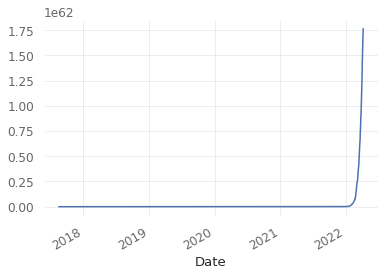

In [36]:
Strategyreturns = df['adjReturns'] 
(Strategyreturns + 1).cumprod()[:].plot()

((0.1 / 100) * 2)

0.002

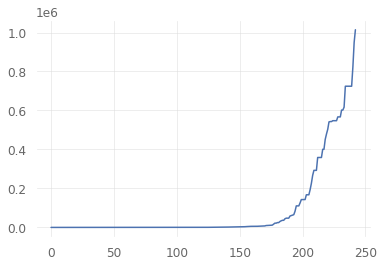

In [52]:
Strategyreturns = df['adjReturns'] 
(Strategyreturns + 1).cumprod()[:].plot()

((0.1 / 100) * 2)

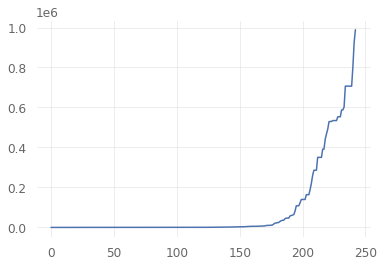

In [54]:
Strategyreturns = df['adjReturns'] 
(Strategyreturns + 1).cumprod()[:].plot()



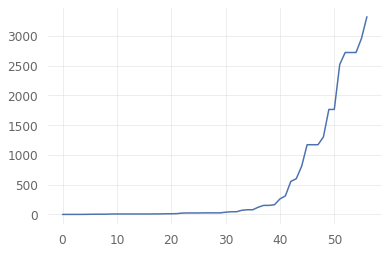

In [59]:
Strategyreturns = df['adjReturns'] 
(Strategyreturns + 1).cumprod()[:].plot()

